# Actividad Semanal -- 7 Regresiones
## Nombre : Ernesto Nicanor Santillán Guerrero

## Matricula : A01793675

## Materia: Ciencia y analítica de datos

## Profesor: María de la Paz Rico Fernández

## Fecha: 11 de Noviembre de 2022

# Linear Models


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [448]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
237,3.514743,32.757822
539,4.564700,29.963752
134,3.039247,50.330588
829,5.650255,38.124766
648,4.992818,33.948027
589,4.734410,40.403041
394,4.119537,56.980989
520,4.512943,33.752006
98,2.766303,58.190435
77,2.603803,46.461065


In [449]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

# 1. 
* Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [450]:
# importamos librerias a utilizar
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
np.random.seed(42)

# importamos librerias de sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE


In [451]:
# Generamos diccionarios para guardar resultados
r2_scores={}
mae_scores={}

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [453]:
print(f"X_train (shape) : {X_train.shape}")
print(f"X_test (shape) : {X_test.shape}")
print(f"y_train (shape) : {y_train.shape}")
print(f"y_test (shape) : {y_test.shape}")


X_train (shape) : (800, 1)
X_test (shape) : (200, 1)
y_train (shape) : (800,)
y_test (shape) : (200,)


# 2. Regresión Lineal.
* Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [454]:
# utilizamos los datos de entrenamiento para estimar regresión
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [455]:
linear_reg.coef_

array([-5.97912772])

In [456]:
linear_reg.intercept_

66.79997932683364

## Modelo generado (ecuación lineal):

$\hat{y} = -5.598X + 66.836$

## Visualización (lineal)

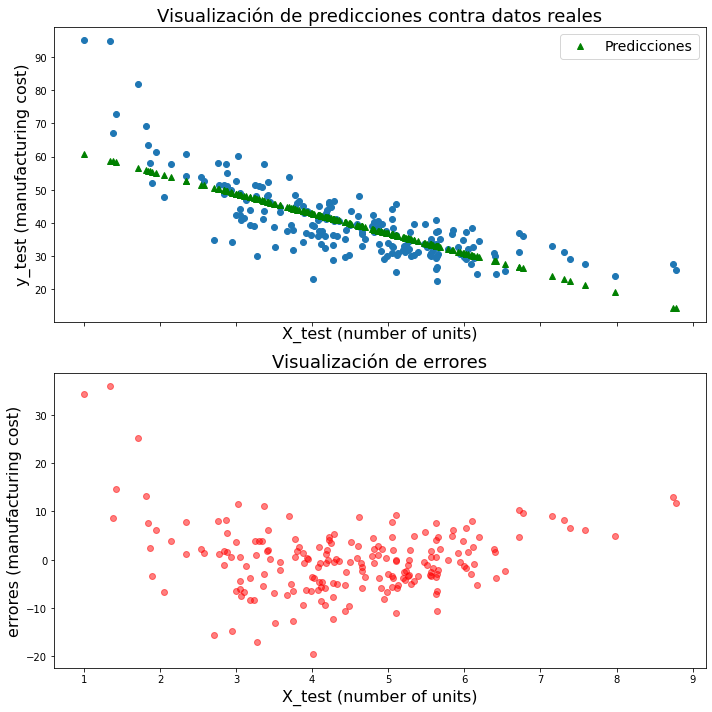

In [457]:
# Aplicamos modelo a los datos de prueba y graficamos predicción de modelo y errores
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,  figsize=(10, 10))
ax1, ax2= axes.flatten()
y_hat = linear_reg.predict(X_test)

ax1.scatter(X_test, y_test);
ax1.plot(X_test, y_hat, "g^", linewidth=2, label="Predicciones")
ax2.scatter(X_test, y_test-y_hat,alpha=.5,c='red');
ax1.set_xlabel("X_test (number of units)", fontsize=16);
ax2.set_xlabel("X_test (number of units)", fontsize=16);
ax1.set_ylabel("y_test (manufacturing cost)", rotation=90, fontsize=16);
ax2.set_ylabel("errores (manufacturing cost)", rotation=90, fontsize=16);
ax1.legend(loc="upper right", fontsize=14);
ax1.set_title("Visualización de predicciones contra datos reales",fontdict={'fontsize': 18, 'fontweight': 'medium'});
ax2.set_title("Visualización de errores",fontdict={'fontsize': 18, 'fontweight': 'medium'});
fig.tight_layout();

## R cuadrada (modelo lineal)


In [458]:
# valor de r cuadrada (usando la información del modelo)
print(f"r cuadrada obtenida con los datos de entrenamiento (modelo) : {linear_reg.score(X_train, y_train):.3f}")
print(f"r cuadrada obtenida con los datos de prueba : {linear_reg.score(X_test, y_test):.3f}")
# guardamos scores
r2_scores['lineal']={}
r2_scores['lineal']['train'] = linear_reg.score(X_train, y_train)
r2_scores['lineal']['test'] =linear_reg.score(X_test, y_test)
mae_scores['lineal']={}
mae_scores['lineal']['train']= MAE(y_train,linear_reg.predict(X_train))
mae_scores['lineal']['test']= MAE(y_test,y_hat)

r cuadrada obtenida con los datos de entrenamiento (modelo) : 0.574
r cuadrada obtenida con los datos de prueba : 0.596


In [459]:
mae_scores

{'lineal': {'train': 4.885796539672616, 'test': 5.033403667160278}}

In [460]:
# valor de r cuadrada (detallando formula)
rsq1=(1 - sum((linear_reg.predict(X_train)-y_train)**2) /  sum((y_train - sum(y_train)/len(y_train))**2)) 
rsq2=(1 - sum((y_hat-y_test)**2) /  sum((y_test - sum(y_test)/len(y_test))**2))
print(f"r cuadrada obtenida con los datos de entrenamiento : {rsq1:.3f}")
print(f"r cuadrada obtenida con los datos de prueba : {rsq2:.3f}")

r cuadrada obtenida con los datos de entrenamiento : 0.574
r cuadrada obtenida con los datos de prueba : 0.596


# 3. Regresión Polinomial.
* Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [461]:
# Iniciamos regresión polinomial (En este caso polinomio de tercer grado)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
# transformamos entrada
X_train_poly = poly_features.fit_transform(X_train)

In [462]:
X_train_poly[0:5]


array([[  4.21150219,  17.7367507 ,  74.69836445],
       [  3.12506671,   9.76604193,  30.5195325 ],
       [  5.04981858,  25.50066767, 128.77374535],
       [  3.6287026 ,  13.16748258,  47.78087832],
       [  6.97697849,  48.67822881, 339.62695518]])

In [463]:
# Generamos regresión polinomial 
linear_reg_p = LinearRegression(fit_intercept=True)
linear_reg_p.fit(X_train_poly, y_train)
linear_reg_p.coef_, linear_reg_p.intercept_

(array([-31.83069901,   4.58905775,  -0.23734936]), 109.5090448246184)

## Modelo generado (ecuación):

$\hat{y} = -32.546X + 4.747X^2 - 0.247X^3 + 88.801$

## Visualización

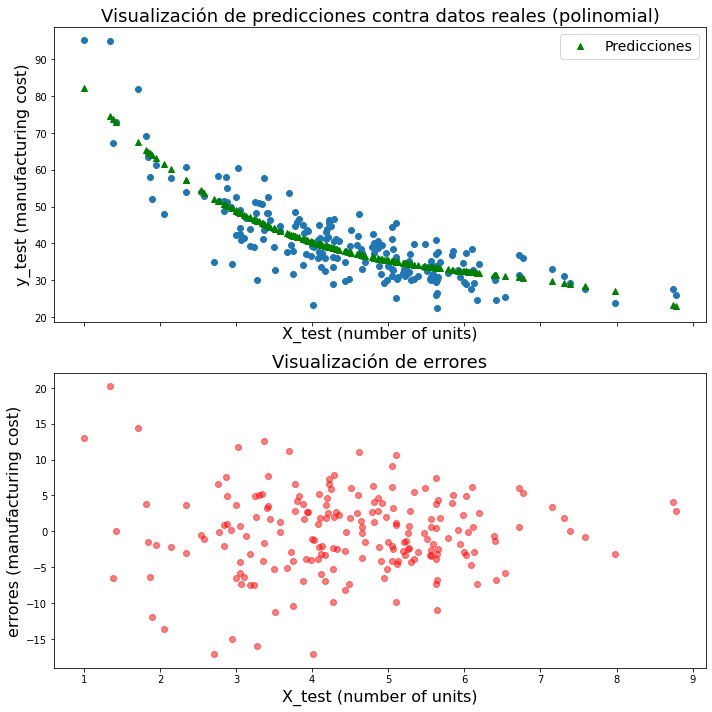

In [464]:
X_test_poly=poly_features.fit_transform(X_test)
# Aplicamos modelo a los datos de prueba y graficamos predicción de modelo y errores
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,  figsize=(10, 10))
ax1, ax2= axes.flatten()
y_hat_p = linear_reg_p.predict(X_test_poly)

ax1.scatter(X_test, y_test);
ax1.plot(X_test, y_hat_p, "g^", linewidth=2, label="Predicciones")
ax2.scatter(X_test, y_test-y_hat_p,alpha=.5,c='red');
ax1.set_xlabel("X_test (number of units)", fontsize=16);
ax2.set_xlabel("X_test (number of units)", fontsize=16);
ax1.set_ylabel("y_test (manufacturing cost)", rotation=90, fontsize=16);
ax2.set_ylabel("errores (manufacturing cost)", rotation=90, fontsize=16);
ax1.legend(loc="upper right", fontsize=14);
ax1.set_title("Visualización de predicciones contra datos reales (polinomial)",fontdict={'fontsize': 18, 'fontweight': 'medium'});
ax2.set_title("Visualización de errores",fontdict={'fontsize': 18, 'fontweight': 'medium'});
fig.tight_layout();

## R cuadrada (modelo polinomial)

In [465]:
# valor de r cuadrada (usando la información del modelo)
print(f"r cuadrada obtenida con los datos de entrenamiento (modelo) : {linear_reg_p.score(X_train_poly, y_train):.3f}")
print(f"r cuadrada obtenida con los datos de prueba : {linear_reg_p.score(X_test_poly, y_test):.3f}")
# guardamos scores
r2_scores['polinomial']={}
r2_scores['polinomial']['train'] = linear_reg_p.score(X_train_poly, y_train)
r2_scores['polinomial']['test'] =linear_reg_p.score(X_test_poly, y_test)
mae_scores['polinomial']={}
mae_scores['polinomial']['train']= MAE(y_train,linear_reg_p.predict(X_train_poly))
mae_scores['polinomial']['test']= MAE(y_test,y_hat_p)

r cuadrada obtenida con los datos de entrenamiento (modelo) : 0.671
r cuadrada obtenida con los datos de prueba : 0.743


In [466]:
# otra manera de calcular r square
r2_score(y_test, y_hat_p)

0.7428388053898056

# 4 Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

# Ridge

In [467]:
# Iniciamos regresión polinomial (En este caso polinomio de tercer grado)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
# transformamos entradas
X_train_poly = poly_features.fit_transform(X_train)

In [468]:
# Generamos modelo regresión con Ridge
linear_ridge = Ridge(fit_intercept=True, alpha=1.0)
linear_ridge.fit(X_train_poly, y_train)
linear_ridge.coef_, linear_ridge.intercept_

(array([-27.45935455,   3.66676159,  -0.17748537]), 103.2315193379538)

## Modelo generado (ecuación usando Ridge):

$\hat{y} = -28.897X + 3.974X^2 - 0.197X^3 + 105.189$

## Visualización

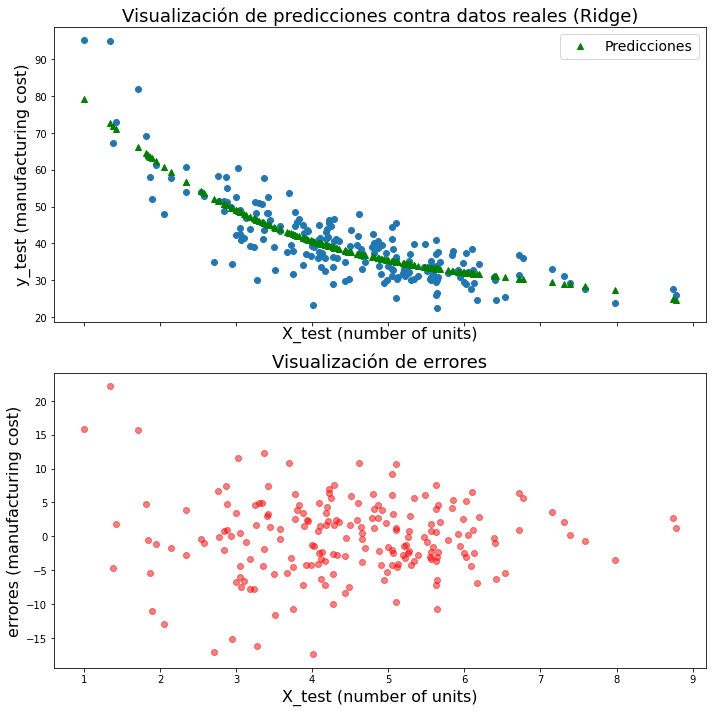

In [469]:
# Aplicamos modelo a los datos de prueba y graficamos predicción de modelo y errores
X_test_poly=poly_features.fit_transform(X_test)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,  figsize=(10, 10))
ax1, ax2= axes.flatten()
y_hat_ridge = linear_ridge.predict(X_test_poly)


ax1.scatter(X_test, y_test);
ax1.plot(X_test, y_hat_ridge, "g^", linewidth=2, label="Predicciones")
ax2.scatter(X_test, y_test-y_hat_ridge,alpha=.5,c='red');
ax1.set_xlabel("X_test (number of units)", fontsize=16);
ax2.set_xlabel("X_test (number of units)", fontsize=16);
ax1.set_ylabel("y_test (manufacturing cost)", rotation=90, fontsize=16);
ax2.set_ylabel("errores (manufacturing cost)", rotation=90, fontsize=16);
ax1.legend(loc="upper right", fontsize=14);
ax1.set_title("Visualización de predicciones contra datos reales (Ridge)",fontdict={'fontsize': 18, 'fontweight': 'medium'});
ax2.set_title("Visualización de errores",fontdict={'fontsize': 18, 'fontweight': 'medium'});
fig.tight_layout();

## R cuadrada (Ridge)

In [470]:
# valor de r cuadrada (usando la información del modelo)
print(f"r cuadrada obtenida con los datos de entrenamiento (modelo) : {linear_ridge.score(X_train_poly, y_train):.3f}")
print(f"r cuadrada obtenida con los datos de prueba : {linear_ridge.score(X_test_poly, y_test):.3f}")
# guardamos scores
r2_scores['Ridge']={}
r2_scores['Ridge']['train'] = linear_ridge.score(X_train_poly, y_train)
r2_scores['Ridge']['test'] =linear_ridge.score(X_test_poly, y_test)
mae_scores['Ridge']={}
mae_scores['Ridge']['train']= MAE(y_train,linear_ridge.predict(X_train_poly))
mae_scores['Ridge']['test']= MAE(y_test,y_hat_ridge)

r cuadrada obtenida con los datos de entrenamiento (modelo) : 0.670
r cuadrada obtenida con los datos de prueba : 0.738


In [471]:
mae_scores

{'lineal': {'train': 4.885796539672616, 'test': 5.033403667160278},
 'polinomial': {'train': 4.492530226819379, 'test': 4.339059416327441},
 'Ridge': {'train': 4.474461562187365, 'test': 4.326794629433279}}

# Lasso

In [472]:
# Iniciamos regresión polinomial (En este caso polinomio de tercer grado)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
from sklearn.linear_model import Lasso
# Trasnformamos entrada
X_train_poly = poly_features.fit_transform(X_train)

In [473]:
# Generamos modelo regresión con Lasso
linear_lasso = Lasso(fit_intercept=True, alpha=1.0)
linear_lasso.fit(X_train_poly, y_train)
linear_lasso.coef_, linear_lasso.intercept_

(array([-0.        , -1.91976298,  0.17297538]), 62.19704917714073)

## Modelo generado (ecuación usando Lasso):

$\hat{y} = 0X + -1.939X^2 + .175X^3 + 62.353$

## Visualización

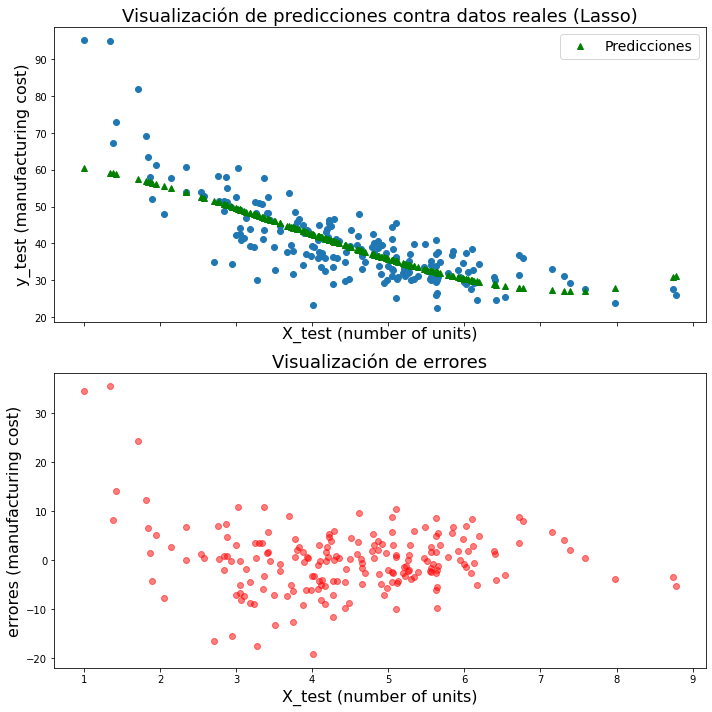

In [474]:
# Aplicamos modelo a los datos de prueba y graficamos predicción de modelo y errores
X_test_poly=poly_features.fit_transform(X_test)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,  figsize=(10, 10))
ax1, ax2= axes.flatten()
y_hat_lasso = linear_lasso.predict(X_test_poly)


ax1.scatter(X_test, y_test);
ax1.plot(X_test, y_hat_lasso, "g^", linewidth=2, label="Predicciones")
ax2.scatter(X_test, y_test-y_hat_lasso,alpha=.5,c='red');
ax1.set_xlabel("X_test (number of units)", fontsize=16);
ax2.set_xlabel("X_test (number of units)", fontsize=16);
ax1.set_ylabel("y_test (manufacturing cost)", rotation=90, fontsize=16);
ax2.set_ylabel("errores (manufacturing cost)", rotation=90, fontsize=16);
ax1.legend(loc="upper right", fontsize=14);
ax1.set_title("Visualización de predicciones contra datos reales (Lasso)",fontdict={'fontsize': 18, 'fontweight': 'medium'});
ax2.set_title("Visualización de errores",fontdict={'fontsize': 18, 'fontweight': 'medium'});
fig.tight_layout();

## R cuadrada (lasso)

In [475]:
# valor de r cuadrada (usando la información del modelo)
print(f"r cuadrada obtenida con los datos de entrenamiento (modelo) : {linear_lasso.score(X_train_poly, y_train):.3f}")
print(f"r cuadrada obtenida con los datos de prueba : {linear_lasso.score(X_test_poly, y_test):.3f}")
# guardamos scores
r2_scores['Lasso']={}
r2_scores['Lasso']['train'] = linear_lasso.score(X_train_poly, y_train)
r2_scores['Lasso']['test'] =linear_lasso.score(X_test_poly, y_test)
mae_scores['Lasso']={}
mae_scores['Lasso']['train']= MAE(y_train,linear_lasso.predict(X_train_poly))
mae_scores['Lasso']['test']= MAE(y_test,y_hat_lasso)

r cuadrada obtenida con los datos de entrenamiento (modelo) : 0.594
r cuadrada obtenida con los datos de prueba : 0.625


# Finalmente grafica :
* MAE (de los cuatro métodos)
* R2 (de los cuatro métodos)

In [476]:
r2_df=pd.DataFrame.from_dict(r2_scores, orient='index')

In [477]:
mae_df=pd.DataFrame.from_dict(mae_scores, orient='index')

In [478]:
r2_df

,train,test
lineal,0.574161,0.595798
polinomial,0.671385,0.742839
Ridge,0.669973,0.737560
Lasso,0.594433,0.625263


In [479]:
mae_df

,train,test
lineal,4.885797,5.033404
polinomial,4.492530,4.339059
Ridge,4.474462,4.326795
Lasso,4.718547,4.722952


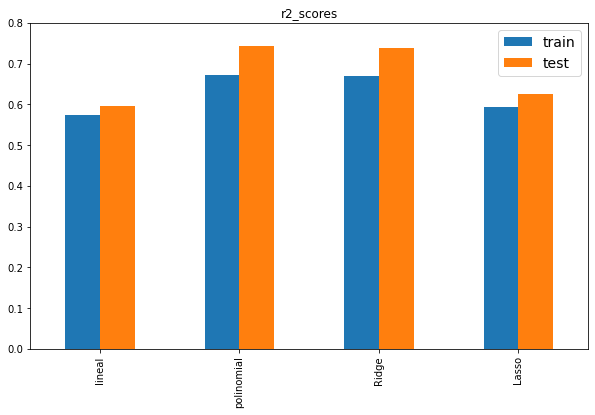

In [480]:
r2_df.plot(kind='bar',figsize=(10,6));
plt.title('r2_scores');
plt.legend(loc="upper right", fontsize=14);
plt.ylim(0,.8);

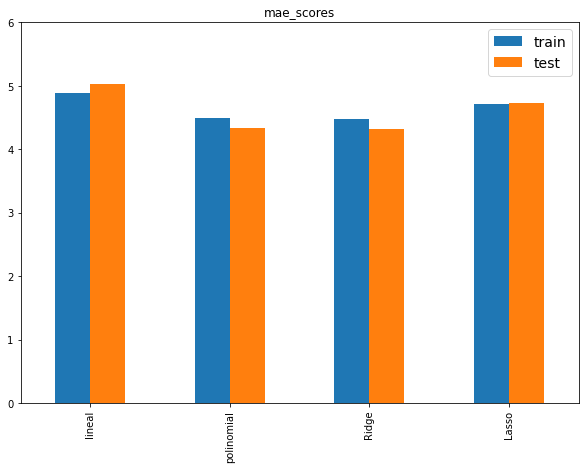

In [481]:
mae_df.plot(kind='bar',figsize=(10,7));
plt.title('mae_scores');
plt.legend(loc="upper right", fontsize=14);
plt.ylim(0,6);

Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

* De los 4 modelos el que dio resultados mas aceptable fue el polinomial de grado 3 con regularizacion Ridge.

* El error medido con la metrica de MAE (mean absolute error score) en el set de prueba fue de 4.32
* Este se interpreta que el error promedio de nuestro  en este conjunto de datos es 4.32 unidades,lo cual
  no  esta mal considerando que la salida (costos de manufactura) tiene un valor promedio de 40.05 unidades

* Para este modelo utilice 80% de los datos de entrenamiento y 20% para los datos de prueba


In [482]:
# valor promedio de los costos de manufactura
y_test.mean()

40.0523633663

# Ejercicio 2. Regresión múltiple

* Realiza la regresión polinomial de los siguientes datos:

In [483]:
# Generamos diccionarios para guardar resultados
r2_scores_={}
mae_scores_={}

In [484]:
# importamos librerias
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
pd.options.display.max_columns=40
pd.options.display.max_rows=120

In [485]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
1227,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,3,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
18849,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,4,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
19369,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
20164,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
7139,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,4,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [487]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [488]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


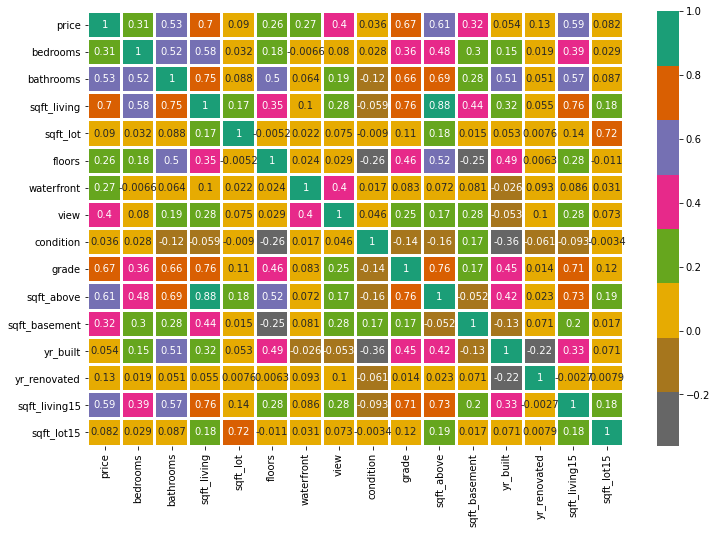

In [489]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [490]:
# no missing values
df.isna().sum().sum()

0

In [491]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [492]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [493]:
#tu codigo aquí

In [494]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
7712,5,2.75,3750,12077,2.0,0,4,3,10,3750,0,2005,0,3120,7255
7545,4,4.50,5250,48352,2.0,0,0,3,10,5250,0,1998,0,2500,48352
4158,3,2.50,2880,10126,2.0,0,0,4,10,2880,0,1985,0,2960,10514
17476,5,1.75,3250,13702,1.0,0,2,3,8,1650,1600,1965,0,2620,11328
20791,4,2.75,3090,5859,2.0,0,0,3,9,3090,0,2010,0,2960,5250


# Explorando los datos

<AxesSubplot:ylabel='Frequency'>

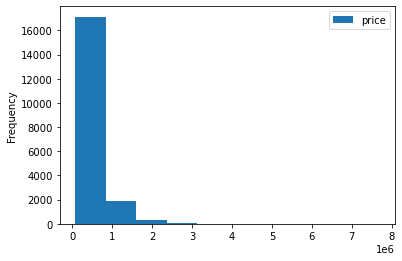

In [495]:
# variable salida con sesgo positivo
y_train.plot(kind='hist')

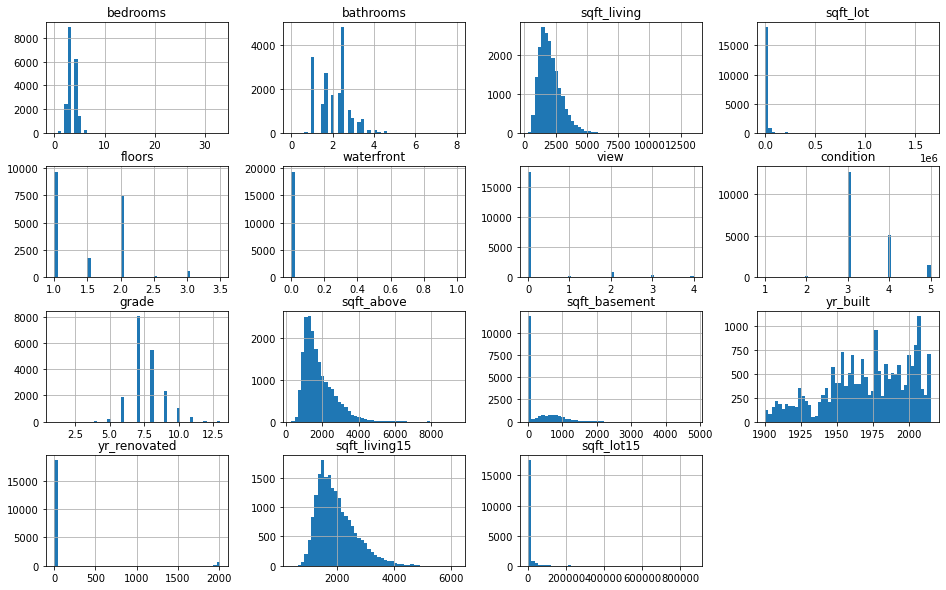

In [496]:
X_train.hist(bins=50, figsize=(16, 10))
plt.show()
fig.tight_layout();

* Se pueden tratar como variables númericas: bedrooms,bathrooms,sqft_living (sesgo a la derecha),sqft_above (sesgo
  a la derecha), sqft_basement (tiene datos atípicos), sqft_living (sesgo a la derecha),sqft_living15( sesgo a la derecha)

In [497]:
X_train['floors'].value_counts()

1.0    9634
2.0    7411
1.5    1721
3.0     536
2.5     141
3.5       8
Name: floors, dtype: int64

In [498]:
sorted(X_train['sqft_lot15'])[-5:]

[434728, 438213, 560617, 858132, 871200]

In [499]:
sorted(X_train['sqft_lot15'])[0:10]

[651, 659, 660, 748, 748, 750, 750, 750, 755, 757]

In [500]:
sorted(X_train['sqft_basement'])[-10:]

[2620, 2730, 2810, 2850, 3000, 3260, 3480, 3500, 4130, 4820]

In [501]:
sorted(X_train['sqft_basement'])[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [502]:
# asumir que es ordinal
X_train['view'].value_counts()

0    17537
2      886
3      452
4      290
1      286
Name: view, dtype: int64

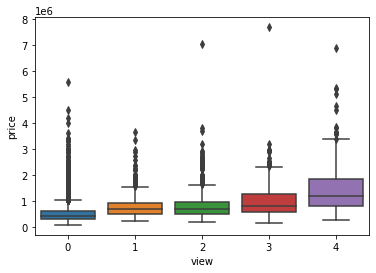

In [503]:
#tratar como ordinal
sns.boxplot(x='view',y='price', data=df);

In [504]:
# Asumir que es categorica (binaria)
X_train['waterfront'].value_counts()

0    19301
1      150
Name: waterfront, dtype: int64

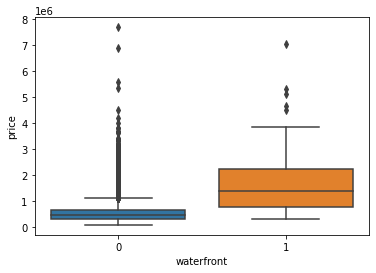

In [505]:
#tratar como ordinal
sns.boxplot(x='waterfront',y='price', data=df);

In [651]:
# Aqui tratar el 0 como data faltante ?
X_train['yr_renovated'].value_counts()[0:10]

0       18622
2014       84
2000       33
2013       32
2003       32
2007       31
2005       30
1990       23
1989       22
2006       22
Name: yr_renovated, dtype: int64

In [654]:
# tratar como variable ordinal
X_train['grade'].value_counts()

7     8073
8     5444
9     2350
6     1854
10    1030
11     357
5      224
12      77
4       26
13      12
3        3
1        1
Name: grade, dtype: int64

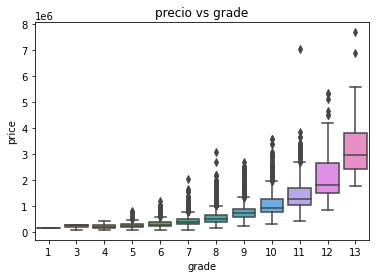

In [653]:
sns.boxplot(x='grade',y='price', data=df);
plt.title("precio vs grade");

In [509]:
# tratar como variable 
X_train['condition'].value_counts()

3    12660
4     5077
5     1528
2      156
1       30
Name: condition, dtype: int64

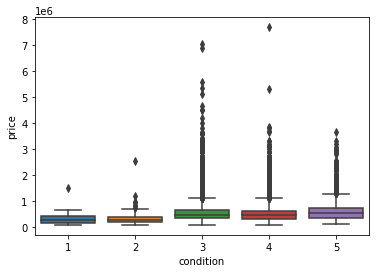

In [510]:
sns.boxplot(x='condition',y='price', data=df);

In [633]:
#definir funciones de soporte

def funNum(x):
  c = x.min()
  tmp = np.log(x-c+1)
  return tmp

def funCaty(yr):
    """
    clasificar por decadas, y categorizar
    """
    bins=[1950,1970,1990,2000]
    return np.digitize(yr,bins)
    
# transformación para salida
def y_Transform(Y):
    Y_ = Y.copy() 
    Y_ = np.power(Y_,(1/4))
    return Y_

# Inversa de la variable de salida que se usará para las predicciones:
def y_inverseTransform(Y):
    Y_ = Y.copy() 
    Y_ = np.power(Y_,4) 
    return Y_


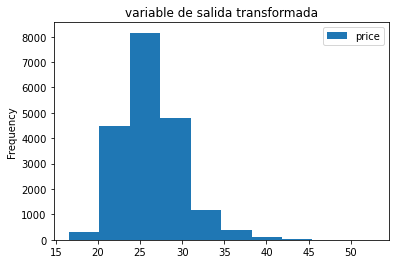

In [634]:
# variable salida con sesgo positivo
y_Transform(y_train).plot(kind='hist');
plt.title('variable de salida transformada');

In [647]:
# definimos variables númericas, númericas con sesgo, categóricas, etc.
#X_train.columns
cat_var_1=['yr_built','yr_renovated']
num_var=['bedrooms','bathrooms','floors']
num_var_sesgo=['sqft_living', 'sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
ordinal_var=['waterfront','view','condition','grade']

# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('escalaNum', StandardScaler())])   
num_pipeline_nombres = num_var

# Transformaciones a factores numéricos de entrada (applicar log):
num_pipeline_s = Pipeline(steps = [('imputer', SimpleImputer()),
                                 ('logNum', FunctionTransformer(funNum)),
                                 ('escalaNum', StandardScaler())])   
num_pipeline_s_nombres = num_var_sesgo

# Transformaciones a factores categóricos y binarios de entrada:
cat_pipeline = Pipeline(steps = [('imputer', SimpleImputer(strategy='most_frequent')),
                                 ('categorizar', FunctionTransformer(funCaty)),
                                   ('OneHotE', OneHotEncoder(drop='first'))])  
cat_pipeline_nombres = cat_var_1

# Transformaciones a factores ordinales:
ordinal_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                     ('OrdinalE', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])
ordinal_pipeline_nombres = ordinal_var


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
ct=columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('numpipe1', num_pipeline_s, num_pipeline_s_nombres),                                                           
                                                        ('catpipe', cat_pipeline, cat_pipeline_nombres),
                                                        ('ordinalpipe', ordinal_pipeline, ordinal_pipeline_nombres)],
                                        remainder='passthrough')

## Regresión lineal

In [648]:
linear_reg = LinearRegression(fit_intercept=True)
pipeline = Pipeline(steps=[('ct',ct),  ('m',linear_reg)])

# Construimos el modelo con las transformaciones de la
# variable de entrada y la variable de salida:
modelo = TransformedTargetRegressor(regressor=pipeline, 
                                    func= y_Transform,     # transformación para ajuste del sesgo.
                                    inverse_func=y_inverseTransform    # Para regresar los valores "y" en la escala original.
                                    )

# Entrenamos con los datos de entrenamiento:
modelo.fit(X_train, y_train)  
# Predicciones con los datos de prueba:
yhat = modelo.predict(X_test)
print(f"coeficientes del modelo : {modelo.regressor_.steps[1][1].coef_}")
print("\n")
print(f"intercepción del modelo : {modelo.regressor_.steps[1][1].intercept_}")

coeficientes del modelo : [-0.15967187  0.35578646  0.16449814  0.2410558   0.03985863  0.5390388
  0.42397046  0.5847661  -0.22917894 -1.54041855 -2.51235811 -3.10961953
 -2.68950861 -0.87647802 -0.45889122  0.49478377  0.86152233  3.36120857
  0.35764935  0.38063942  1.47667604]


intercepción del modelo : 18.7392709501243


## R cuadrada (lineal)

In [649]:
# guardamos scores
print(f"R2 score : {modelo.score(X_test, y_test)}")
print(f"MAE : {MAE(y_test,yhat)}")
r2_scores_['lineal']={}
r2_scores_['lineal']['train'] = modelo.score(X_train, y_train)
r2_scores_['lineal']['test'] =modelo.score(X_test, y_test)
mae_scores_['lineal']={}
mae_scores_['lineal']['train']= MAE(y_train,modelo.predict(X_train))
mae_scores_['lineal']['test']= MAE(y_test,modelo.predict(X_test))

R2 score : 0.701953057974462
MAE : 124666.77809709572


# Visualización (lineal)

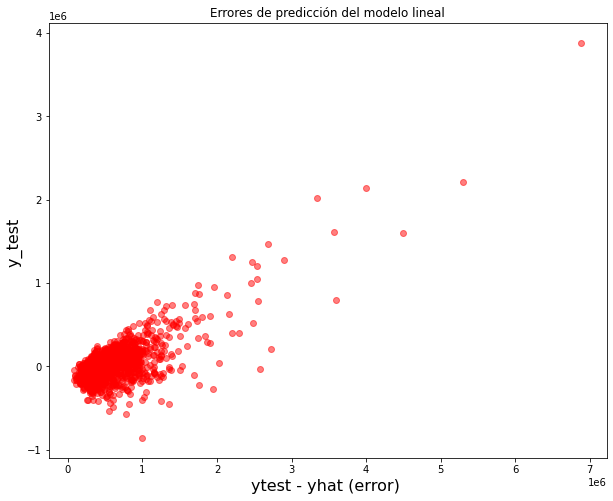

In [547]:
# Aplicamos modelo a los datos de prueba y graficamos predicción de modelo y errores
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True,  figsize=(10, 8))
y_hat = modelo.predict(X_test)
plt.scatter(y_test, (y_test-y_hat),alpha=.5,c='red');
plt.ylabel("y_test ", rotation=90, fontsize=16);
plt.xlabel("ytest - yhat (error) ", rotation=0, fontsize=16);
plt.title('Errores de predicción del modelo lineal');

Text(0.5, 1.0, 'Distribución de los errores (modelo lineal)')

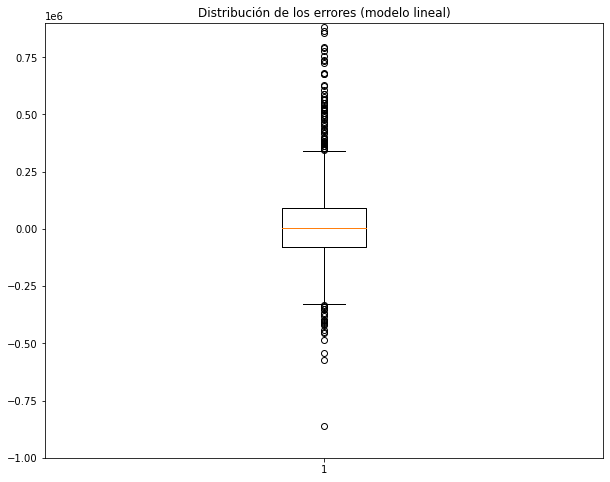

In [548]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True,  figsize=(10, 8))
plt.boxplot( (y_test-y_hat));
plt.ylim(-1000000,900000)
plt.title("Distribución de los errores (modelo lineal)")

## Regresión Polinomial

In [535]:
# Iniciamos regresión polinomial (En este caso polinomio de tercer grado)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# transformamos entrada
X_train_poly1 = poly_features.fit_transform(X_train)
X_test_poly1 = poly_features.fit_transform(X_test)

In [538]:
# Generamos regresión polinomial 
linear_reg_p1 = LinearRegression(fit_intercept=True)
linear_reg_p1.fit(X_train_poly1, y_train)
yhat = linear_reg_p1.predict(X_test_poly1)
print(f"coeficientes del modelo polinomial : {linear_reg_p1.coef_} ")
print("\n")
print(f"intercepción del modelo polinomial : {linear_reg_p1.intercept_}")

coeficientes del modelo polinomial : [[ 9.33824378e+05 -1.09249005e+06 -5.00587834e+02 -2.78648854e+01
  -2.07428554e+06 -3.95426309e+06 -2.88646864e+05  5.58562924e+05
   1.09860212e+06 -1.75930881e+02 -3.38457197e+02 -8.59723675e+04
  -2.95368022e+03  3.99968170e+03 -3.40100102e+01  9.57350951e+02
   7.49863408e+03 -1.44586027e+01 -1.87546802e-02  8.57732439e+03
  -1.14890656e+04 -3.07934440e+02 -5.24552379e+03 -5.36679124e+03
  -5.46072172e-01 -1.39431828e+01 -4.67050557e+02 -9.13076321e+00
   1.72753328e+01  2.15866935e-01 -9.62999874e+03  1.55122516e+01
  -1.35428392e-01 -2.59042811e+04  4.33695550e+04  3.83028832e+03
  -1.08176741e+03  2.22976388e+04  1.42990388e+01  1.21328838e+00
   5.02979367e+02 -1.70885032e+01 -1.72856315e+01 -5.60971343e-02
  -4.12149990e+00 -3.43970439e+00  4.83312003e+00  1.60300315e+02
  -1.42702121e+01  1.31200090e+01  2.07326820e+01  3.79968697e+00
   2.67872342e+00 -1.62726013e+00  4.35984375e-02 -9.37554575e-01
  -1.21332091e+01  3.06870788e-07  4.40

## R cuadrada (Polinomial)

In [541]:
# guardamos scores
print(f"R2 score : {linear_reg_p1.score(X_test_poly1, y_test)}")
print(f"MAE : {MAE(y_test,yhat)}")
r2_scores_['polinomial']={}
r2_scores_['polinomial']['train'] = linear_reg_p1.score(X_train_poly1, y_train)
r2_scores_['polinomial']['test'] =linear_reg_p1.score(X_test_poly1, y_test)
mae_scores_['polinomial']={}
mae_scores_['polinomial']['train']= MAE(y_train,linear_reg_p1.predict(X_train_poly1))
mae_scores_['polinomial']['test']= MAE(y_test,linear_reg_p1.predict(X_test_poly1))

R2 score : 0.7797906575595208
MAE : 121314.10864748241


# Visualización (polinomial)

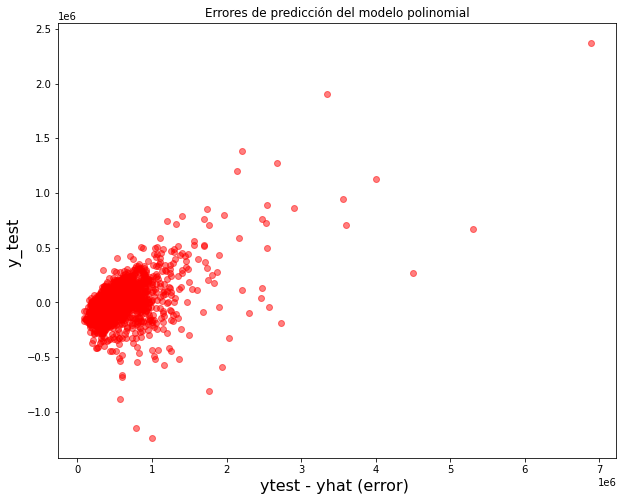

In [543]:
# Aplicamos modelo a los datos de prueba y graficamos predicción de modelo y errores
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True,  figsize=(10, 8))
y_hat = linear_reg_p1.predict(X_test_poly1)
plt.scatter(y_test, (y_test-y_hat),alpha=.5,c='red');
plt.ylabel("y_test ", rotation=90, fontsize=16);
plt.xlabel("ytest - yhat (error) ", rotation=0, fontsize=16);
plt.title('Errores de predicción del modelo polinomial');

In [ ]:
# Generamos regresión polinomial 
linear_reg_p1 = LinearRegression(fit_intercept=True)
linear_reg_p1.fit(X_train_poly1, y_train)
yhat = linear_reg_p1.predict(X_test_poly1)
print(f"coeficientes del modelo polinomial : {linear_reg_p1.coef_} ")
print("\n")
print(f"intercepción del modelo polinomial : {linear_reg_p1.intercept_}")

Text(0.5, 1.0, 'Distribución de los errores (modelo polinomial)')

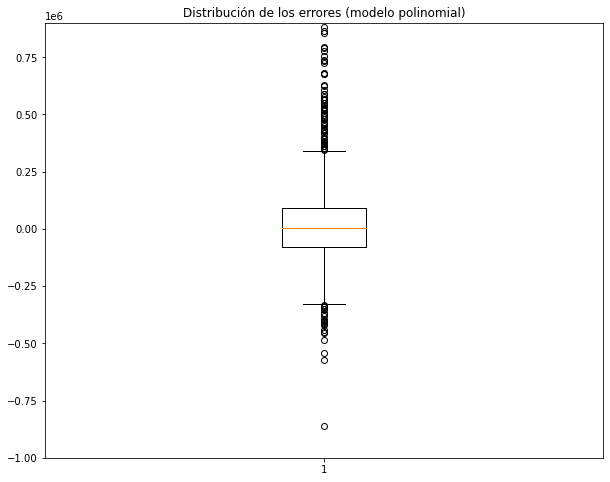

In [549]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True,  figsize=(10, 8))
plt.boxplot( (y_test-y_hat));
plt.ylim(-1000000,900000)
plt.title("Distribución de los errores (modelo polinomial)")

## Regresión Ridge

In [557]:
# Iniciamos regresión polinomial (En este caso polinomio de tercer grado)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# transformamos entrada
X_train_poly1 = poly_features.fit_transform(X_train)
X_test_poly1 = poly_features.fit_transform(X_test)

In [576]:
# Generamos regresión polinomial 
linear_ridge1 = Ridge(fit_intercept=True,alpha=1)
linear_ridge1.fit(X_train_poly1, y_train)
yhat = linear_ridge1.predict(X_test_poly1)
print(f"coeficientes del modelo polinomial : {linear_ridge1.coef_} ")
print("\n")
print(f"intercepción del modelo polinomial : {linear_ridge1.intercept_}")

coeficientes del modelo polinomial : [[ 4.60210391e+05 -2.83372105e+05 -5.50098644e+02 -2.82440753e+01
  -3.80412994e+05 -1.05300866e+05 -3.14224799e+05  2.78074412e+05
   4.58273788e+05 -3.81496264e+02 -5.60927438e+00 -9.44155508e+04
  -3.20987244e+03  4.23088532e+03 -3.23672547e+01  9.32955743e+02
   3.48696146e+03 -4.96430395e+01 -2.14992829e-02  4.70477803e+03
  -2.56455953e+04  3.24442665e+02 -3.01418375e+03 -5.66027535e+03
   3.74240898e+01  2.38305987e+01 -2.22973131e+02 -4.78145377e+00
   1.54253337e+01  1.97217910e-01 -5.25080857e+03  1.29475480e+01
  -1.30084788e-01 -1.47620850e+04  6.45322988e+04  2.42723205e+03
  -7.85469911e+03  1.77293700e+04  1.55218422e+01  3.38383295e+00
   1.06179029e+02 -2.44422089e+01 -1.18902404e+01 -2.74309866e-02
   3.12938931e+01  9.21387284e+01 -2.39292680e+01  1.81410885e+02
   1.02865015e+01  1.13322720e+02 -4.52768357e+01  7.97112098e+00
   5.02034957e+01  2.40727376e+01 -5.63864653e+01 -1.20394925e+01
  -4.53615885e+01  3.20990615e-07  4.52

## R cuadrada (Ridge)

In [577]:
# guardamos scores
print(f"R2 score : {linear_ridge1.score(X_test_poly1, y_test)}")
print(f"MAE : {MAE(y_test,yhat)}")
r2_scores_['ridge']={}
r2_scores_['ridge']['train'] = linear_ridge1.score(X_train_poly1, y_train)
r2_scores_['ridge']['test'] =linear_ridge1.score(X_test_poly1, y_test)
mae_scores_['ridge']={}
mae_scores_['ridge']['train']= MAE(y_train,linear_ridge1.predict(X_train_poly1))
mae_scores_['ridge']['test']= MAE(y_test,linear_ridge1.predict(X_test_poly1))

R2 score : 0.7799967836029482
MAE : 121404.82654130233


# Visualización (ridge)

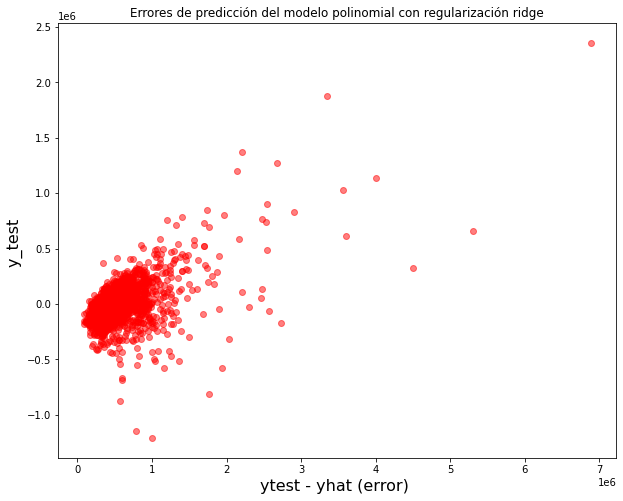

In [578]:
# Aplicamos modelo a los datos de prueba y graficamos predicción de modelo y errores
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True,  figsize=(10, 8))
y_hat = linear_ridge1.predict(X_test_poly1)
plt.scatter(y_test, (y_test-y_hat),alpha=.5,c='red');
plt.ylabel("y_test ", rotation=90, fontsize=16);
plt.xlabel("ytest - yhat (error) ", rotation=0, fontsize=16);
plt.title('Errores de predicción del modelo polinomial con regularización ridge');

Text(0.5, 1.0, 'Distribución de los errores (modelo ridge)')

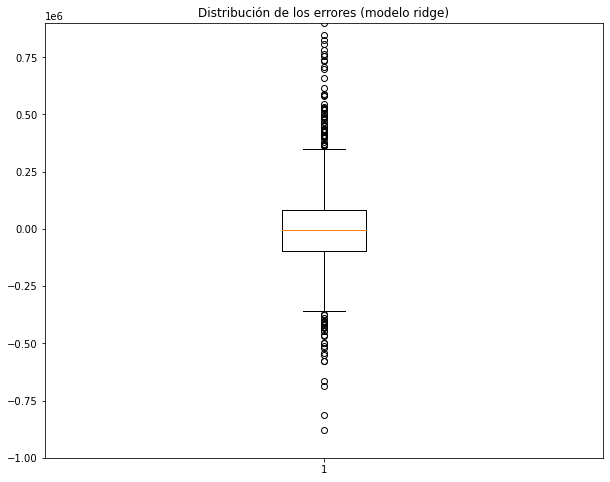

In [579]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True,  figsize=(10, 8))
plt.boxplot( (y_test-y_hat));
plt.ylim(-1000000,900000)
plt.title("Distribución de los errores (modelo ridge)")

## Regresión Lasso

In [655]:
# Iniciamos regresión polinomial (En este caso polinomio de tercer grado)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# transformamos entrada
X_train_poly1 = poly_features.fit_transform(X_train)
X_test_poly1 = poly_features.fit_transform(X_test)

In [656]:
# Generamos regresión polinomial (lasso)
linear_lasso1 = Lasso(fit_intercept=True,alpha=1,tol=1e-2)
linear_lasso1.fit(X_train_poly1, y_train)
yhat = linear_lasso1.predict(X_test_poly1)
print(f"coeficientes del modelo polinomial : {linear_lasso1.coef_} ")
print("\n")
print(f"intercepción del modelo polinomial : {linear_lasso1.intercept_}")

coeficientes del modelo polinomial : [ 1.25146350e+05  1.53697177e+05  7.96659429e+01 -3.03090606e+00
 -4.62761060e+04  2.25762162e+05  7.69809611e+04  1.34009909e+05
  1.79959829e+05 -1.83114788e+02 -5.98522478e+01 -3.83208834e+03
 -2.47121236e+02  1.35046847e+02 -1.53284654e+00  1.07433010e+03
 -3.07147216e+03 -2.05681731e+01 -1.79188803e-01  8.09707963e+03
 -2.18675074e+04 -1.17766829e+02 -1.70826807e+03 -3.85569921e+03
  7.52096406e+00  2.98824177e-01 -6.22382161e+01  4.52689267e-02
  1.88863844e+01  2.66425000e-01  1.14417250e+03  4.56513666e+01
 -2.28612753e-02 -2.69241773e+04  5.51814316e+04  6.05414945e+03
 -1.99572193e+04  1.80739021e+04 -1.33537979e+01 -3.79298592e+01
 -6.83273628e+01 -2.72410643e+01 -3.39310989e+01  1.37007730e-01
  1.96437448e-02 -1.73712856e-04  4.26278282e+00 -6.63959685e+01
  3.21892856e+01 -1.28309830e+01  2.24899850e+01 -5.34030915e-02
  2.67701819e-02 -5.23450573e-02 -1.40186288e-03  1.54975675e-03
 -4.70484761e-04 -1.03271281e-08  4.66180939e-01 -2.1

C:\Users\AdminMVD\AppData\Local\PythonPlus\64bit\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.356e+14, tolerance: 2.572e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## R cuadrada (Lasso)

In [657]:
# guardamos scores
print(f"R2 score : {linear_lasso1.score(X_test_poly1, y_test)}")
print(f"MAE : {MAE(y_test,yhat)}")
r2_scores_['lasso']={}
r2_scores_['lasso']['train'] = linear_lasso1.score(X_train_poly1, y_train)
r2_scores_['lasso']['test'] =linear_lasso1.score(X_test_poly1, y_test)
mae_scores_['lasso']={}
mae_scores_['lasso']['train']= MAE(y_train,linear_lasso1.predict(X_train_poly1))
mae_scores_['lasso']['test']= MAE(y_test,linear_lasso1.predict(X_test_poly1))

R2 score : 0.7758582259015321
MAE : 122442.91797698366


In [658]:
mae_scores_

{'lineal': {'train': 126884.5150178282, 'test': 124666.77809709572},
 'polinomial': {'train': 123190.65973625686, 'test': 121314.10864748241},
 'ridge': {'train': 123400.20368992008, 'test': 121404.82654130233},
 'lasso': {'train': 124945.68804974794, 'test': 122442.91797698366}}

# Visualización (Lasso)

In [599]:
# Aplicamos modelo a los datos de prueba y graficamos predicción de modelo y errores
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True,  figsize=(10, 8))
y_hat = linear_lasso1.predict(X_test_poly1)
plt.scatter(y_test, (y_test-y_hat),alpha=.5,c='red');
plt.ylabel("y_test ", rotation=90, fontsize=16);
plt.xlabel("ytest - yhat (error) ", rotation=0, fontsize=16);
plt.title('Errores de predicción del modelo polinomial con regularización lasso');

In [600]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True,  figsize=(10, 8))
plt.boxplot( (y_test-y_hat));
plt.ylim(-1000000,900000)
plt.title("Distribución de los errores (modelo lasso)")

# Finalmente grafica :
* MAE (de los cuatro métodos)
* R2 (de los cuatro métodos)

In [602]:
r2_df1=pd.DataFrame.from_dict(r2_scores_, orient='index')

In [603]:
mae_df1=pd.DataFrame.from_dict(mae_scores_, orient='index')

In [604]:
r2_df1

,train,test
lineal,0.691842,0.701953
polinomial,0.746952,0.779791
ridge,0.746069,0.779997
lasso,0.739091,0.775858


In [605]:
mae_df1

,train,test
lineal,126884.515018,124666.778097
polinomial,123190.659736,121314.108647
ridge,123400.203690,121404.826541
lasso,124945.688050,122442.917977


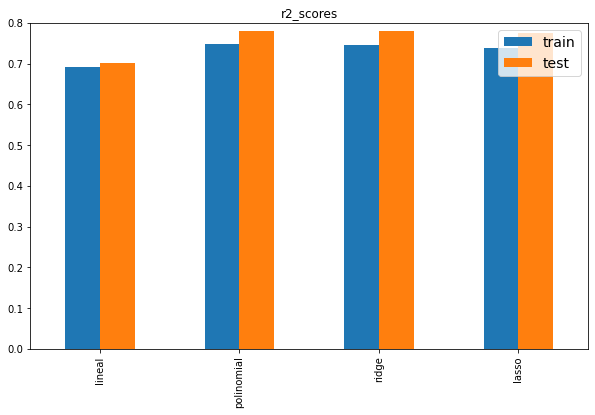

In [606]:
r2_df1.plot(kind='bar',figsize=(10,6));
plt.title('r2_scores');
plt.legend(loc="upper right", fontsize=14);
plt.ylim(0,.8);

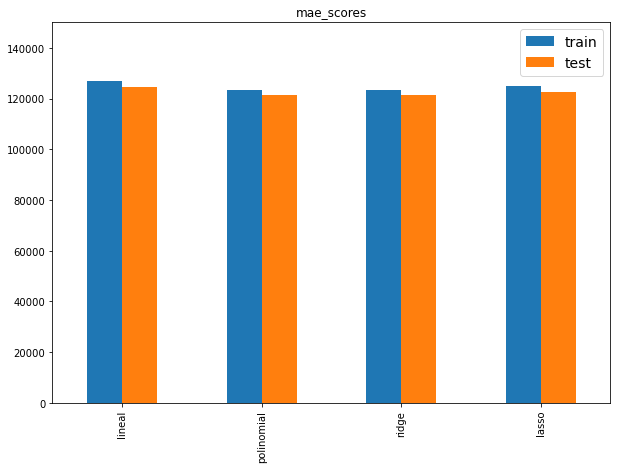

In [615]:
mae_df1.plot(kind='bar',figsize=(10,7));
plt.title('mae_scores');
plt.legend(loc="upper right", fontsize=14);
plt.ylim(0,150000);

Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

* De los 4 modelos el que dio resultados mas aceptable fue el polinomial de grado 3 con regularizacion Ridge.

* El error medido con la metrica de MAE (mean absolute error score) en el set de prueba fue de 121000
* Este se interpreta que el error promedio de nuestro  en este conjunto de datos es 121000 unidades,lo cual
  no  es muy bueno considerando que la salida (precios de casa) tiene un valor promedio de 548521 unidades.
  Probablemente con mas tiempo y jugando con las variables de entrada se puede obtener un mejor resultado.
    
* Creo los valores de R cuadrada fueron bastante aceptables (.78). Casi el 80% de la salida la pude explicar 
  con los datos

* Para este modelo utilice 80% de los datos de entrenamiento y 20% para los datos de prueba


In [659]:
# valor promedio de los costos de manufactura
y_test.mean()

price    548521.752081
dtype: float64